# Data analysis of Cryptocurrency

### Problem Statement:
**`from given the different currencies check how efficient is the market? are there arbitrage opportunities? are there any new currencies to explore?`**

### Import essential libraries

In [1]:
import numpy as np
import pandas as pd

import requests
from bs4 import BeautifulSoup
import re

import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact,interact_manual

In [2]:
import warnings
warnings.filterwarnings('ignore')

- selected 9 currencies by their prices
- list of currencies:
    - Bitcoin
    - Ethereum
    - Wrapped Bitcoin
    - Lido Staked Ethereum
    - Bitcoin Binance Chain Evolution Proposal 2(BEP2)
    - Huobi Bitcoin
    - yearn.finance
    - Tether Gold
    - renBTC

In [3]:
%%time

name=[]
date=[]
Open=[]
high=[]
low=[]
close=[]
adj_close=[]
volume = []
currencies = ['BTC-USD','ETH-USD','WBTC-USD','STETH-USD','BTCB-USD','HBTC-USD','YFI-USD','XAUT-USD','RENBTC-USD']

for i in currencies:
    headers = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36'}
    url = 'https://finance.yahoo.com/quote/{}/history?period1=1508025600&period2=1665792000&interval=1wk&filter=history&frequency=1wk&includeAdjustedClose=true'.format(i)
    
    r = requests.get(url,headers=headers)
    soup = BeautifulSoup(r.text,'html.parser')
    
    for table in soup.find_all('table'):
        table.get('class')
    tables = soup.find_all('table')
    table = soup.find('table', class_='W(100%)')
    
    symbols = soup.find('h1',attrs={'class':'D(ib) Fz(18px)'}).text
    
    for row in table.tbody.find_all('tr'):    
        columns = row.find_all('td')
        if len(columns)==7:
            name.append(symbols)
            date.append(columns[0].text)
            Open.append(columns[1].text)
            high.append(columns[2].text)
            low.append(columns[3].text)
            close.append(columns[4].text)
            adj_close.append(columns[5].text)
            volume.append(columns[6].text)

CPU times: total: 1.53 s
Wall time: 7.77 s


### DataFrame creation

In [4]:
data = pd.DataFrame({'Name':name,'Date':date,'Open':Open,'High':high,'Low':low,'Close':close,'Adj_Close':adj_close,'Volume':volume})
data

,Name,Date,Open,High,Low,Close,Adj_Close,Volume
0,Bitcoin USD (BTC-USD),"Oct 10, 2022","19,446.42","19,889.15","18,319.82","19,067.63","19,067.63","179,951,161,793"
1,Bitcoin USD (BTC-USD),"Oct 03, 2022","19,044.07","20,408.39","19,025.23","19,446.43","19,446.43","196,809,212,801"
2,Bitcoin USD (BTC-USD),"Sep 26, 2022","18,803.90","20,338.46","18,553.30","19,044.11","19,044.11","280,290,121,527"
3,Bitcoin USD (BTC-USD),"Sep 19, 2022","19,418.57","19,674.63","18,290.31","18,802.10","18,802.10","252,873,598,365"
4,Bitcoin USD (BTC-USD),"Sep 12, 2022","21,770.15","22,673.82","19,387.49","19,419.51","19,419.51","261,900,187,496"
...,...,...,...,...,...,...,...,...
890,renBTC USD (RENBTC-USD),"Dec 14, 2020","19,169.22","24,188.72","19,025.91","23,452.34","23,452.34","49,721,618"
891,renBTC USD (RENBTC-USD),"Dec 07, 2020","19,359.13","19,400.02","17,625.54","19,158.75","19,158.75","55,816,025"
892,renBTC USD (RENBTC-USD),"Nov 30, 2020","18,097.56","19,823.26","17,805.88","19,341.09","19,341.09","31,720,929"
893,renBTC USD (RENBTC-USD),"Nov 23, 2020","18,118.62","19,278.34","16,338.98","18,083.50","18,083.50","4,678,852"


### Saving results data to csv

In [5]:
data.to_csv('crypto_project_week.csv',index=False)

In [3]:
dataset=pd.read_csv('crypto_project_week.csv')
dataset

,Name,Date,Open,High,Low,Close,Adj_Close,Volume
0,Bitcoin USD (BTC-USD),"Oct 10, 2022","19,446.42","19,889.15","18,319.82","19,067.63","19,067.63","179,951,161,793"
1,Bitcoin USD (BTC-USD),"Oct 03, 2022","19,044.07","20,408.39","19,025.23","19,446.43","19,446.43","196,809,212,801"
2,Bitcoin USD (BTC-USD),"Sep 26, 2022","18,803.90","20,338.46","18,553.30","19,044.11","19,044.11","280,290,121,527"
3,Bitcoin USD (BTC-USD),"Sep 19, 2022","19,418.57","19,674.63","18,290.31","18,802.10","18,802.10","252,873,598,365"
4,Bitcoin USD (BTC-USD),"Sep 12, 2022","21,770.15","22,673.82","19,387.49","19,419.51","19,419.51","261,900,187,496"
...,...,...,...,...,...,...,...,...
890,renBTC USD (RENBTC-USD),"Dec 14, 2020","19,169.22","24,188.72","19,025.91","23,452.34","23,452.34","49,721,618"
891,renBTC USD (RENBTC-USD),"Dec 07, 2020","19,359.13","19,400.02","17,625.54","19,158.75","19,158.75","55,816,025"
892,renBTC USD (RENBTC-USD),"Nov 30, 2020","18,097.56","19,823.26","17,805.88","19,341.09","19,341.09","31,720,929"
893,renBTC USD (RENBTC-USD),"Nov 23, 2020","18,118.62","19,278.34","16,338.98","18,083.50","18,083.50","4,678,852"


### Data Cleaning

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 895 entries, 0 to 894
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       895 non-null    object
 1   Date       895 non-null    object
 2   Open       895 non-null    object
 3   High       895 non-null    object
 4   Low        895 non-null    object
 5   Close      895 non-null    object
 6   Adj_Close  895 non-null    object
 7   Volume     895 non-null    object
dtypes: object(8)
memory usage: 56.1+ KB


#### removing comma (',') from currencies

In [5]:
dataset.replace(',','',regex=True,inplace=True)
dataset

,Name,Date,Open,High,Low,Close,Adj_Close,Volume
0,Bitcoin USD (BTC-USD),Oct 10 2022,19446.42,19889.15,18319.82,19067.63,19067.63,179951161793
1,Bitcoin USD (BTC-USD),Oct 03 2022,19044.07,20408.39,19025.23,19446.43,19446.43,196809212801
2,Bitcoin USD (BTC-USD),Sep 26 2022,18803.90,20338.46,18553.30,19044.11,19044.11,280290121527
3,Bitcoin USD (BTC-USD),Sep 19 2022,19418.57,19674.63,18290.31,18802.10,18802.10,252873598365
4,Bitcoin USD (BTC-USD),Sep 12 2022,21770.15,22673.82,19387.49,19419.51,19419.51,261900187496
...,...,...,...,...,...,...,...,...
890,renBTC USD (RENBTC-USD),Dec 14 2020,19169.22,24188.72,19025.91,23452.34,23452.34,49721618
891,renBTC USD (RENBTC-USD),Dec 07 2020,19359.13,19400.02,17625.54,19158.75,19158.75,55816025
892,renBTC USD (RENBTC-USD),Nov 30 2020,18097.56,19823.26,17805.88,19341.09,19341.09,31720929
893,renBTC USD (RENBTC-USD),Nov 23 2020,18118.62,19278.34,16338.98,18083.50,18083.50,4678852


#### Date format is Dec 07 2020 convert it into normal datetime format

In [6]:
#Oct 12, 2022

dataset['Date'] = pd.to_datetime(dataset.Date, format='%b %d %Y')
dataset['Date']

0     2022-10-10
1     2022-10-03
2     2022-09-26
3     2022-09-19
4     2022-09-12
         ...    
890   2020-12-14
891   2020-12-07
892   2020-11-30
893   2020-11-23
894   2020-11-16
Name: Date, Length: 895, dtype: datetime64[ns]

#### changing datatype of numerical columns to float

In [7]:
dataset.loc[:,'Open':]=dataset.loc[:,'Open':].astype(float)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 895 entries, 0 to 894
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Name       895 non-null    object        
 1   Date       895 non-null    datetime64[ns]
 2   Open       895 non-null    float64       
 3   High       895 non-null    float64       
 4   Low        895 non-null    float64       
 5   Close      895 non-null    float64       
 6   Adj_Close  895 non-null    float64       
 7   Volume     895 non-null    float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 56.1+ KB


#### check for null values

In [8]:
dataset.isnull().sum()

Name         0
Date         0
Open         0
High         0
Low          0
Close        0
Adj_Close    0
Volume       0
dtype: int64

- no null values so we are moving further
- we are creating copy of dataframe for safe side

In [9]:
data = dataset.copy()
data

,Name,Date,Open,High,Low,Close,Adj_Close,Volume
0,Bitcoin USD (BTC-USD),2022-10-10,19446.42,19889.15,18319.82,19067.63,19067.63,1.799512e+11
1,Bitcoin USD (BTC-USD),2022-10-03,19044.07,20408.39,19025.23,19446.43,19446.43,1.968092e+11
2,Bitcoin USD (BTC-USD),2022-09-26,18803.90,20338.46,18553.30,19044.11,19044.11,2.802901e+11
3,Bitcoin USD (BTC-USD),2022-09-19,19418.57,19674.63,18290.31,18802.10,18802.10,2.528736e+11
4,Bitcoin USD (BTC-USD),2022-09-12,21770.15,22673.82,19387.49,19419.51,19419.51,2.619002e+11
...,...,...,...,...,...,...,...,...
890,renBTC USD (RENBTC-USD),2020-12-14,19169.22,24188.72,19025.91,23452.34,23452.34,4.972162e+07
891,renBTC USD (RENBTC-USD),2020-12-07,19359.13,19400.02,17625.54,19158.75,19158.75,5.581602e+07
892,renBTC USD (RENBTC-USD),2020-11-30,18097.56,19823.26,17805.88,19341.09,19341.09,3.172093e+07
893,renBTC USD (RENBTC-USD),2020-11-23,18118.62,19278.34,16338.98,18083.50,18083.50,4.678852e+06


#### unique values

In [10]:
data.nunique()

Name           9
Date         100
Open         894
High         895
Low          895
Close        895
Adj_Close    895
Volume       895
dtype: int64

### Basic  Analysis

In [11]:
data.head()

,Name,Date,Open,High,Low,Close,Adj_Close,Volume
0,Bitcoin USD (BTC-USD),2022-10-10,19446.42,19889.15,18319.82,19067.63,19067.63,1.799512e+11
1,Bitcoin USD (BTC-USD),2022-10-03,19044.07,20408.39,19025.23,19446.43,19446.43,1.968092e+11
2,Bitcoin USD (BTC-USD),2022-09-26,18803.90,20338.46,18553.30,19044.11,19044.11,2.802901e+11
3,Bitcoin USD (BTC-USD),2022-09-19,19418.57,19674.63,18290.31,18802.10,18802.10,2.528736e+11
4,Bitcoin USD (BTC-USD),2022-09-12,21770.15,22673.82,19387.49,19419.51,19419.51,2.619002e+11


In [12]:
data.tail()

,Name,Date,Open,High,Low,Close,Adj_Close,Volume
890,renBTC USD (RENBTC-USD),2020-12-14,19169.22,24188.72,19025.91,23452.34,23452.34,49721618.0
891,renBTC USD (RENBTC-USD),2020-12-07,19359.13,19400.02,17625.54,19158.75,19158.75,55816025.0
892,renBTC USD (RENBTC-USD),2020-11-30,18097.56,19823.26,17805.88,19341.09,19341.09,31720929.0
893,renBTC USD (RENBTC-USD),2020-11-23,18118.62,19278.34,16338.98,18083.50,18083.50,4678852.0
894,renBTC USD (RENBTC-USD),2020-11-16,15747.46,19378.06,15589.11,18119.96,18119.96,3801162.0


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 895 entries, 0 to 894
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Name       895 non-null    object        
 1   Date       895 non-null    datetime64[ns]
 2   Open       895 non-null    float64       
 3   High       895 non-null    float64       
 4   Low        895 non-null    float64       
 5   Close      895 non-null    float64       
 6   Adj_Close  895 non-null    float64       
 7   Volume     895 non-null    float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 56.1+ KB


In [53]:
data.describe()

,Open,High,Low,Close,Adj_Close,Volume
count,895.000000,895.000000,895.000000,895.000000,895.000000,8.950000e+02
mean,25394.305352,27673.799106,23044.527844,25400.015050,25400.015050,4.873060e+10
std,19893.474910,22033.990396,18172.933167,19892.974514,19892.974514,1.039975e+11
min,447.560000,579.370000,0.080000,558.070000,558.070000,5.602000e+03
25%,2828.265000,3108.790000,2469.620000,2828.340000,2828.340000,2.702038e+07
50%,24286.640000,26775.110000,21723.290000,24289.100000,24289.100000,3.541116e+08
75%,41904.930000,44817.175000,38068.150000,41911.920000,41911.920000,2.860445e+09
max,65894.000000,162188.250000,62540.630000,65910.880000,65910.880000,7.666798e+11


#### from above table we can say that:
    - mean and median of all columns are approximate
    - it means we have very few outliers
    - and that would be higher outliers

In [15]:
data.describe(include='object')

,Name
count,895
unique,9
top,Bitcoin USD (BTC-USD)
freq,100


#### boxplot to check outliers in each numerical column

In [16]:
col=list(data.columns)[2:]
col

['Open', 'High', 'Low', 'Close', 'Adj_Close', 'Volume']

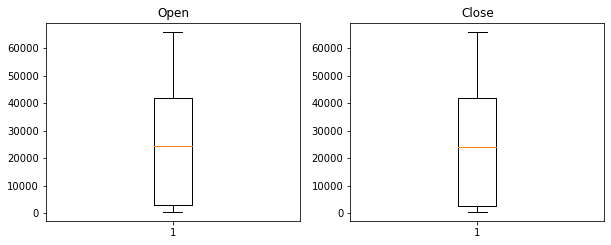

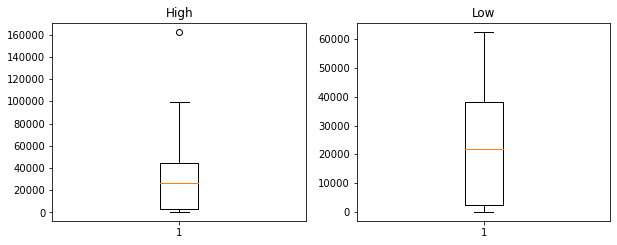

In [17]:
plt.figure(1,figsize=(10,8))

plt.subplot(2,2,1)
plt.boxplot(data['Open'])
plt.title('Open')

plt.subplot(2,2,2)
plt.boxplot(data['Close'])
plt.title('Close')

plt.figure(2,figsize=(10,8))

plt.subplot(2,2,1)
plt.boxplot(data['High'])
plt.title('High')

plt.subplot(2,2,2)
plt.boxplot(data['Low'])
plt.title('Low')

plt.show()

#### Oservations:
- In Open, Close and Low not outliers
- but in High we found one higher outlier
- lets check for which row it is present

In [18]:
data[data['High']==data['High'].max()]

,Name,Date,Open,High,Low,Close,Adj_Close,Volume
247,Wrapped Bitcoin USD (WBTC-USD),2021-11-15,64555.96,162188.25,55209.36,58316.12,58316.12,1.920630e+09


Text(0.5, 1.0, 'Volume')

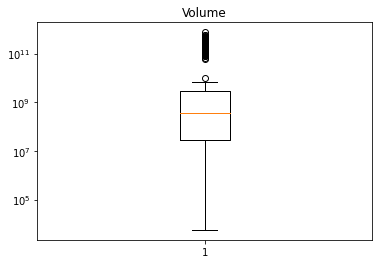

In [19]:
plt.figure()
plt.boxplot(data['Volume'])
plt.yscale('log')
plt.title('Volume')

#### Observations:
- we have noticed outliers are huge present above upper boundries

#### Outliers and IQR

In [20]:
q1 = data['Volume'].quantile(0.25)
q3 = data['Volume'].quantile(0.75)
iqr = q3-q1

lb = q1 - (1.5*iqr)
ub = q3 + (1.5*iqr)

outlier_len = len(data[(data['Volume'] < lb) | (data['Volume'] > ub)])
print('IQR=',iqr,'Outlier length=',outlier_len,sep='\n')

IQR=
2833424544.0
Outlier length=
201


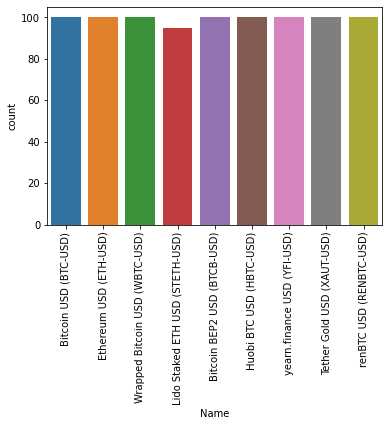

In [21]:
sns.countplot(x='Name', data=data)
plt.xticks(rotation=90)
plt.show()

### Stastical Analysis

In [22]:
data.mean()

Open         2.539431e+04
High         2.767380e+04
Low          2.304453e+04
Close        2.540002e+04
Adj_Close    2.540002e+04
Volume       4.873060e+10
dtype: float64

In [23]:
data.median()

Open         2.428664e+04
High         2.677511e+04
Low          2.172329e+04
Close        2.428910e+04
Adj_Close    2.428910e+04
Volume       3.541116e+08
dtype: float64

In [24]:
data.std()

Date         201 days 04:46:13.899080576
Open                         19893.47491
High                        22033.990396
Low                         18172.933167
Close                       19892.974514
Adj_Close                   19892.974514
Volume               103997545691.537674
dtype: object

In [25]:
data.skew()

Open         0.171149
High         0.419629
Low          0.196481
Close        0.170185
Adj_Close    0.170185
Volume       2.528292
dtype: float64

#### observations:
- except volume column all other data is symmetric
- volume column's data is asymmetric

In [26]:
data.kurt()

Open        -1.294220
High         0.265185
Low         -1.263195
Close       -1.294424
Adj_Close   -1.294424
Volume       7.229512
dtype: float64

#### observations:
- graph of volume will be leptokurtic i.e. our data is concentrated within a particaular range
- others are platykurtic cause data is symmetrical

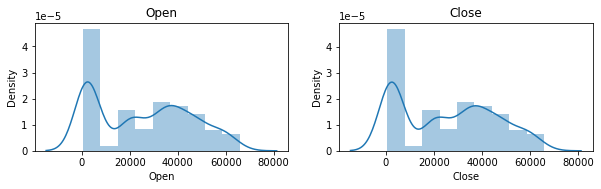

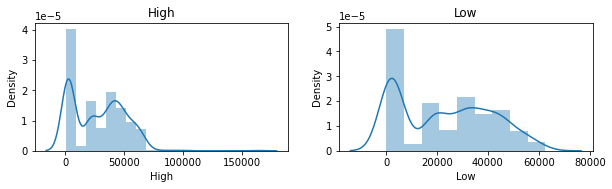

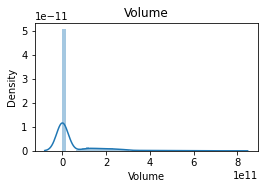

In [27]:
plt.figure(1,figsize=(10,8))

plt.subplot(3,2,1)
sns.distplot(data['Open'])
plt.title('Open')

plt.subplot(3,2,2)
sns.distplot(data['Close'])
plt.title('Close')

plt.figure(2,figsize=(10,8))

plt.subplot(3,2,1)
sns.distplot(data['High'])
plt.title('High')

plt.subplot(3,2,2)
sns.distplot(data['Low'])
plt.title('Low')

plt.figure(3,figsize=(4,8))
plt.subplot(3,1,1)
sns.distplot(data['Volume'])

plt.title('Volume')

plt.show()

#### Observations:
- except volume all columns are highly correlated
- and with volume all columns have weak positive correlation

## Bivariate Analysis:

#### covariance

In [51]:
data.corr()

,Open,High,Low,Close,Adj_Close,Volume
Open,1.000000,0.980897,0.984329,0.983515,0.983515,0.036689
High,0.980897,1.000000,0.970406,0.978280,0.978280,0.031026
Low,0.984329,0.970406,1.000000,0.990128,0.990128,0.033528
Close,0.983515,0.978280,0.990128,1.000000,1.000000,0.034191
Adj_Close,0.983515,0.978280,0.990128,1.000000,1.000000,0.034191
Volume,0.036689,0.031026,0.033528,0.034191,0.034191,1.000000


#### Observations:
- Every column is highly correlative to Volume
- increase in volume will cause effect in all columns

In [29]:
@interact_manual
def regplot(x=data.select_dtypes('float').columns,y=data.select_dtypes('float').columns):
    sns.regplot(x=data[x],y=data[y],data=data)

interactive(children=(Dropdown(description='x', options=('Open', 'High', 'Low', 'Close', 'Adj_Close', 'Volume'…

#### Observation over timeperiod

In [30]:
@interact_manual
def relplot(x='Date',y=data.select_dtypes('float').columns):
    sns.relplot(x=data[x],y=data[y],data=data, kind='line',palette='PuBu')
    plt.xticks(rotation=90)

interactive(children=(Text(value='Date', description='x'), Dropdown(description='y', options=('Open', 'High', …

In [61]:
by_name=data.pivot_table(index=['Name'],values=data.loc['Open':],aggfunc='mean')
by_name.sort_values('Open',ascending=False)

,Adj_Close,Close,High,Low,Open,Volume
Name,,,,,,
Huobi BTC USD (HBTC-USD),38942.728500,38942.728500,41913.714500,35659.024100,38928.821000,2.033784e+08
Bitcoin USD (BTC-USD),38895.428100,38895.428100,41764.557400,35635.322900,38860.623300,2.769558e+11
Wrapped Bitcoin USD (WBTC-USD),38861.711400,38861.711400,42637.931400,35621.986800,38829.311800,1.674572e+09
Bitcoin BEP2 USD (BTCB-USD),38852.221500,38852.221500,41876.224700,34640.785000,38821.157900,3.404738e+08
renBTC USD (RENBTC-USD),38835.736600,38835.736600,42185.470500,35572.344500,38805.326300,1.052964e+08
yearn.finance USD (YFI-USD),26407.544600,26407.544600,30290.197100,23100.851700,26511.377900,1.894367e+09
Lido Staked ETH USD (STETH-USD),2459.774105,2459.774105,2701.193158,2204.475474,2453.324421,1.935290e+08
Ethereum USD (ETH-USD),2385.880600,2385.880600,2601.715800,2139.077400,2377.186300,1.547718e+11
Tether Gold USD (XAUT-USD),1812.098000,1812.098000,1844.557100,1784.880100,1814.570200,9.372613e+06


In [32]:
def pie(data,col):
    explode=[0.05,0.05,0.10,0.05,0.10,0.25,0.05,0.05,0.05]
    return data.plot(kind='pie',y=col,legend=None,figsize=(10,10),colormap='magma',explode=explode)

<AxesSubplot:ylabel='Open'>

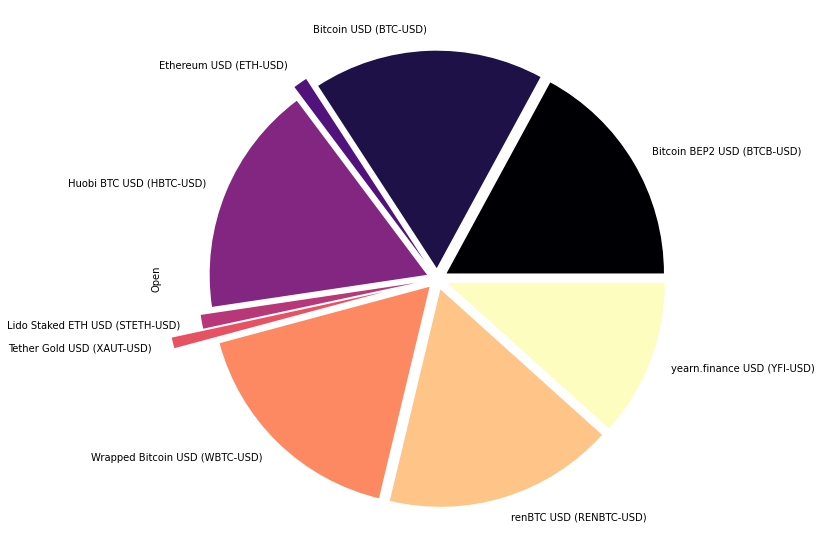

In [33]:
pie(by_name,'Open')

In [34]:
by_date=data.pivot_table(index=['Date'],values=data.loc['Open':'Volume'],aggfunc='sum')
by_date

,Adj_Close,Close,High,Low,Open,Volume
Date,,,,,,
2020-11-16,118177.02,118177.02,131719.68,99691.70,101532.07,3.988033e+11
2020-11-23,117633.51,117633.51,125827.04,102768.47,118173.08,4.545953e+11
2020-11-30,128165.36,128165.36,133649.12,117122.31,117635.57,3.789140e+11
2020-12-07,124526.79,124526.79,129160.94,104939.84,128199.88,2.778010e+11
2020-12-14,145560.23,145560.23,152565.94,120830.12,124570.62,3.871553e+11
...,...,...,...,...,...,...
2022-09-12,109672.00,109672.00,128492.23,109372.49,123959.35,3.928879e+11
2022-09-19,106339.90,106339.90,111912.46,103043.28,109728.11,3.700724e+11
2022-09-26,107362.60,107362.60,115095.70,105008.99,106331.09,3.763599e+11


#### Lollipop Chart

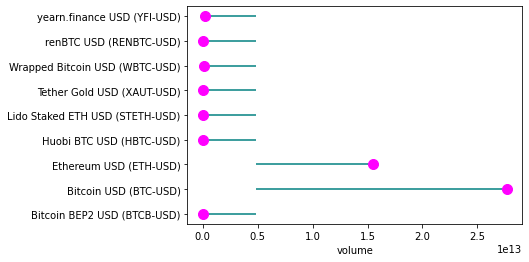

In [35]:
x=by_name.index
y=by_name.Volume
plt.hlines(y=x, xmin = y.mean() , xmax = y, color='teal')
plt.plot(y, x, "o",linewidth=2, markersize=10,color='magenta')
plt.xlabel('volume')
plt.savefig('lollipop_chart')
plt.show()

### Multivariate Analysis

#### Quartarly change of prices

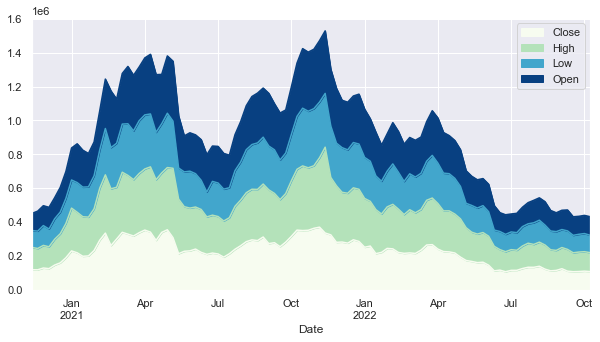

In [36]:
sns.set()
by_date.loc[:,'Close':'Open'].plot.area(figsize=(10,5),cmap='GnBu')
plt.show()

#### Observations:
- in 2021 from month of february to may we market values has raised
- in 2022 from month of october to november high raise in values
- in 2022 we are getting continuous falls in currencies since april

In [47]:
def relplot(data,col):
    sns.set(rc={"figure.figsize":(10,5)})
    sns.relplot(x='Date', y=col, data=data, kind='line', hue='Name', palette=',magma',height=10,aspect=1.5)
    plt.xticks(rotation=90)
    plt.show()

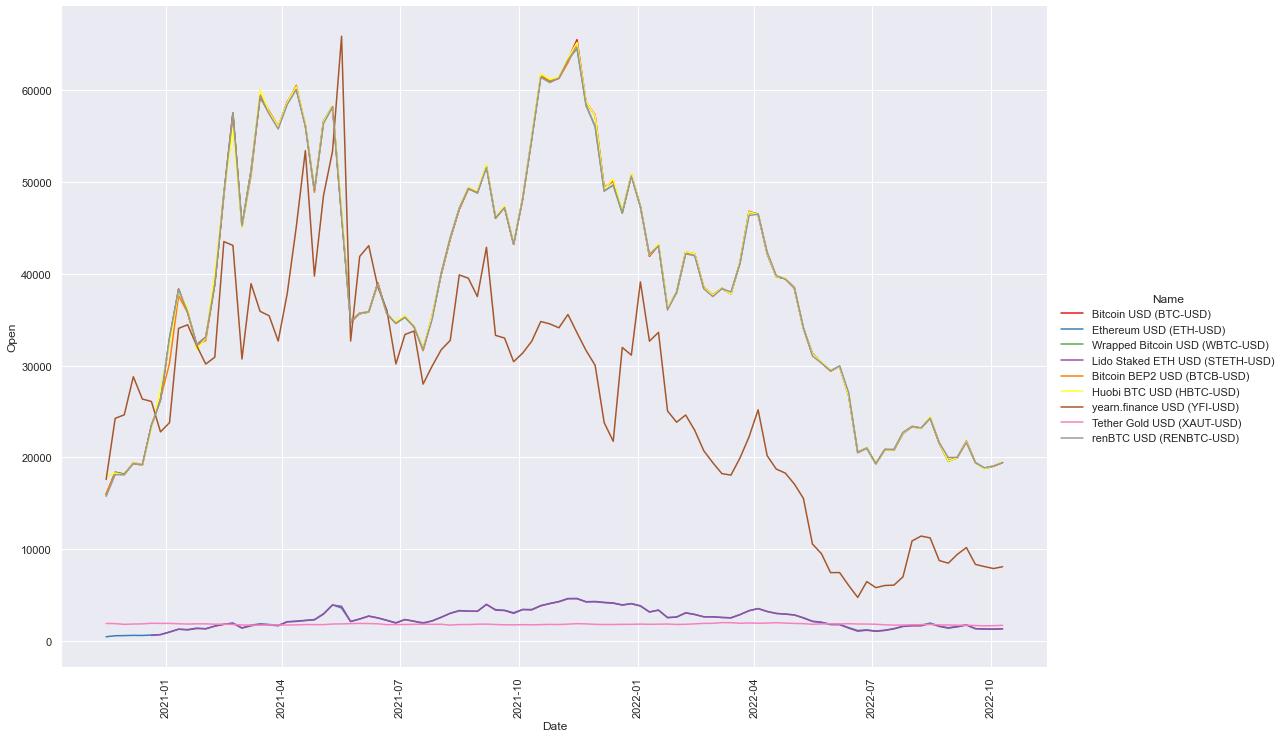

In [48]:
relplot(data,'Open')

In [43]:
data.Name.unique()

array(['Bitcoin USD (BTC-USD)', 'Ethereum USD (ETH-USD)',
       'Wrapped Bitcoin USD (WBTC-USD)',
       'Lido Staked ETH USD (STETH-USD)', 'Bitcoin BEP2 USD (BTCB-USD)',
       'Huobi BTC USD (HBTC-USD)', 'yearn.finance USD (YFI-USD)',
       'Tether Gold USD (XAUT-USD)', 'renBTC USD (RENBTC-USD)'],
      dtype=object)

In [46]:
data[data['Name']=='Bitcoin USD (BTC-USD)']

,Name,Date,Open,High,Low,Close,Adj_Close,Volume
0,Bitcoin USD (BTC-USD),2022-10-10,19446.42,19889.15,18319.82,19067.63,19067.63,1.799512e+11
1,Bitcoin USD (BTC-USD),2022-10-03,19044.07,20408.39,19025.23,19446.43,19446.43,1.968092e+11
2,Bitcoin USD (BTC-USD),2022-09-26,18803.90,20338.46,18553.30,19044.11,19044.11,2.802901e+11
3,Bitcoin USD (BTC-USD),2022-09-19,19418.57,19674.63,18290.31,18802.10,18802.10,2.528736e+11
4,Bitcoin USD (BTC-USD),2022-09-12,21770.15,22673.82,19387.49,19419.51,19419.51,2.619002e+11
...,...,...,...,...,...,...,...,...
95,Bitcoin USD (BTC-USD),2020-12-14,19144.49,24209.66,19012.71,23477.29,23477.29,2.817233e+11
96,Bitcoin USD (BTC-USD),2020-12-07,19343.13,19411.83,17619.53,19142.38,19142.38,1.936788e+11
97,Bitcoin USD (BTC-USD),2020-11-30,18178.32,19845.97,18178.32,19345.12,19345.12,2.530888e+11
98,Bitcoin USD (BTC-USD),2020-11-23,18370.02,19390.96,16351.04,18177.48,18177.48,3.019394e+11


In [45]:
data[data['Name']=='Wrapped Bitcoin USD (WBTC-USD)']

,Name,Date,Open,High,Low,Close,Adj_Close,Volume
200,Wrapped Bitcoin USD (WBTC-USD),2022-10-10,19446.63,19826.85,18323.72,19070.88,19070.88,6.271004e+08
201,Wrapped Bitcoin USD (WBTC-USD),2022-10-03,19039.04,20400.22,18998.94,19445.46,19445.46,6.975480e+08
202,Wrapped Bitcoin USD (WBTC-USD),2022-09-26,18794.76,20320.17,18559.32,19037.03,19037.03,9.324445e+08
203,Wrapped Bitcoin USD (WBTC-USD),2022-09-19,19405.31,19620.09,18274.08,18794.29,18794.29,1.436558e+09
204,Wrapped Bitcoin USD (WBTC-USD),2022-09-12,21734.01,22585.32,19362.54,19396.01,19396.01,1.448484e+09
...,...,...,...,...,...,...,...,...
295,Wrapped Bitcoin USD (WBTC-USD),2020-12-14,19168.21,24285.59,19037.35,23472.00,23472.00,1.937363e+09
296,Wrapped Bitcoin USD (WBTC-USD),2020-12-07,19376.77,19421.30,17624.47,19163.82,19163.82,2.782986e+08
297,Wrapped Bitcoin USD (WBTC-USD),2020-11-30,18177.11,19897.24,18177.11,19383.04,19383.04,3.364216e+08
298,Wrapped Bitcoin USD (WBTC-USD),2020-11-23,18398.17,19402.63,16361.61,18167.78,18167.78,3.826595e+08


#### Observations:
- Etheriun, Lido and Tether Gold are not much volatile coins
- others are highly volatile

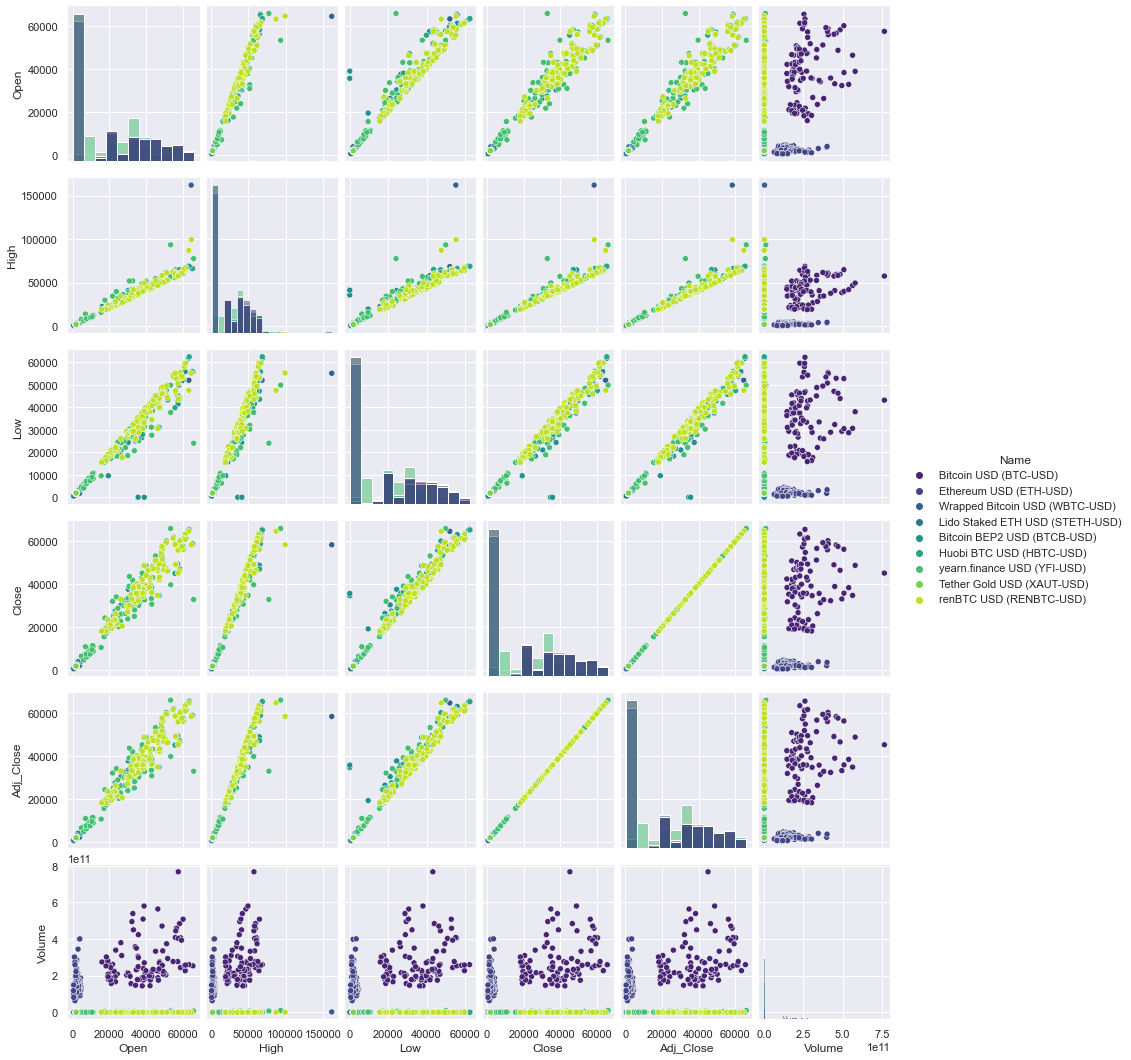

In [39]:
sns.pairplot(data=data, aspect=.85,hue='Name',diag_kind='hist',palette='viridis')


#### Observations:
- by observing above plot we can say that
    - except Volume the correlation between all the columns is positive
    - by observing plots for Volume we can say that there is lot of trading happening in perticular coins like
        - bitcoin
        - ethereum

# Conclusion :
- **Ethereum, Lido and Tether Gold are non-volatile coins**
- **If you are interested in stable and safe investments then you should prefer non-volatile coins.**
- **We can observe that renBTC and Huobi are also good investments**
- **You should keep patience when you are investing volatile coins**